In [ ]:
# default_exp gbe.sst.reliability

# SST - Reliability

<div>
    <p style="float: left;"><img src="images/fruit_game.png" alt="Drawing" style="width: 200px; border-right:10px solid white"/> 
        
<div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)
from trr265 import plotting

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.sst.data_provider import SSTDataProvider
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data(update=True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
#df = df.query("is_initial and is_baseline")
df = df.query("is_baseline==True")

Preparing sst_data


## Test-retest reliability

### Based on integration method

R[write to console]: Lade nötiges Paket: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.506,3.047,416.0,417.0,0.0,0.443,0.563,".51 (.44, .56)"
Single_random_raters,ICC2,0.520,3.451,416.0,416.0,0.0,0.422,0.599,".52 (.42, .60)"
Single_fixed_raters,ICC3,0.551,3.451,416.0,416.0,0.0,0.492,0.604,".55 (.49, .60)"
Average_raters_absolute,ICC1k,0.672,3.047,416.0,417.0,0.0,0.614,0.721,".67 (.61, .72)"
Average_random_raters,ICC2k,0.684,3.451,416.0,416.0,0.0,0.594,0.750,".68 (.59, .75)"
Average_fixed_raters,ICC3k,0.710,3.451,416.0,416.0,0.0,0.659,0.753,".71 (.66, .75)"


,variance,Percent
ID,2768.974,0.520
Items,299.685,0.056
Residual,2259.832,0.424
Total,5328.491,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


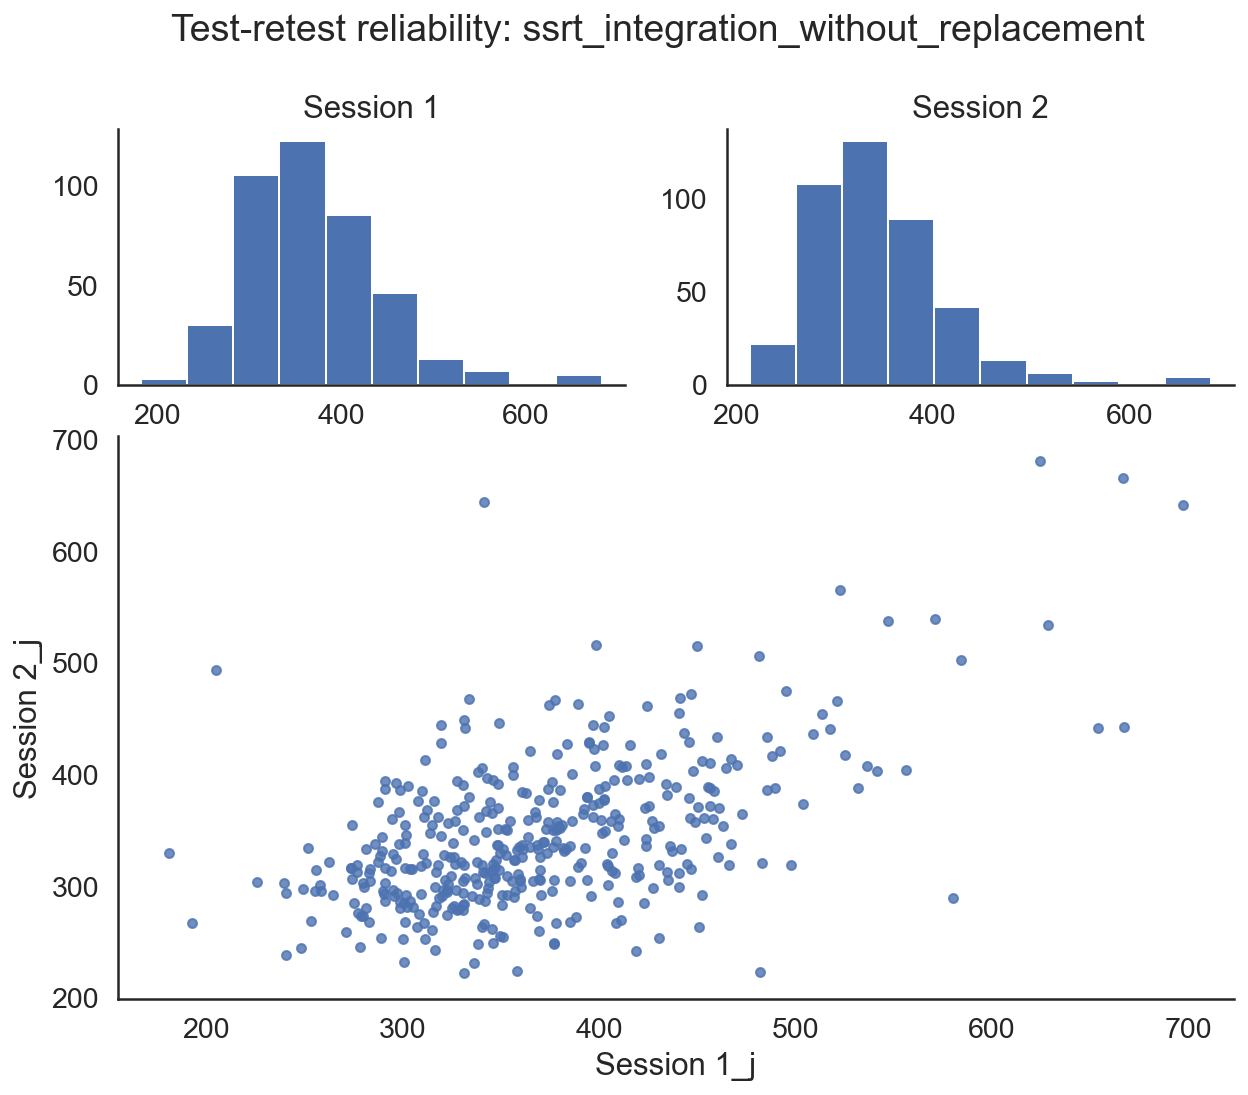

In [ ]:
_df = sst_scoring.get_integration_without_replacement_ssrts(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_integration_wo_replacement = stats.analyze_reliability(_df, dependent = 'ssrt_integration_without_replacement', add_jitter = True)

### Based on mean method

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.475,2.811,416.0,417.0,0.0,0.410,0.535,".48 (.41, .54)"
Single_random_raters,ICC2,0.495,3.292,416.0,416.0,0.0,0.380,0.586,".49 (.38, .59)"
Single_fixed_raters,ICC3,0.534,3.292,416.0,416.0,0.0,0.474,0.589,".53 (.47, .59)"
Average_raters_absolute,ICC1k,0.644,2.811,416.0,417.0,0.0,0.582,0.697,".64 (.58, .70)"
Average_random_raters,ICC2k,0.662,3.292,416.0,416.0,0.0,0.550,0.739,".66 (.55, .74)"
Average_fixed_raters,ICC3k,0.696,3.292,416.0,416.0,0.0,0.643,0.742,".70 (.64, .74)"


,variance,Percent
ID,1889.442,0.495
Items,282.186,0.074
Residual,1648.656,0.432
Total,3820.284,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


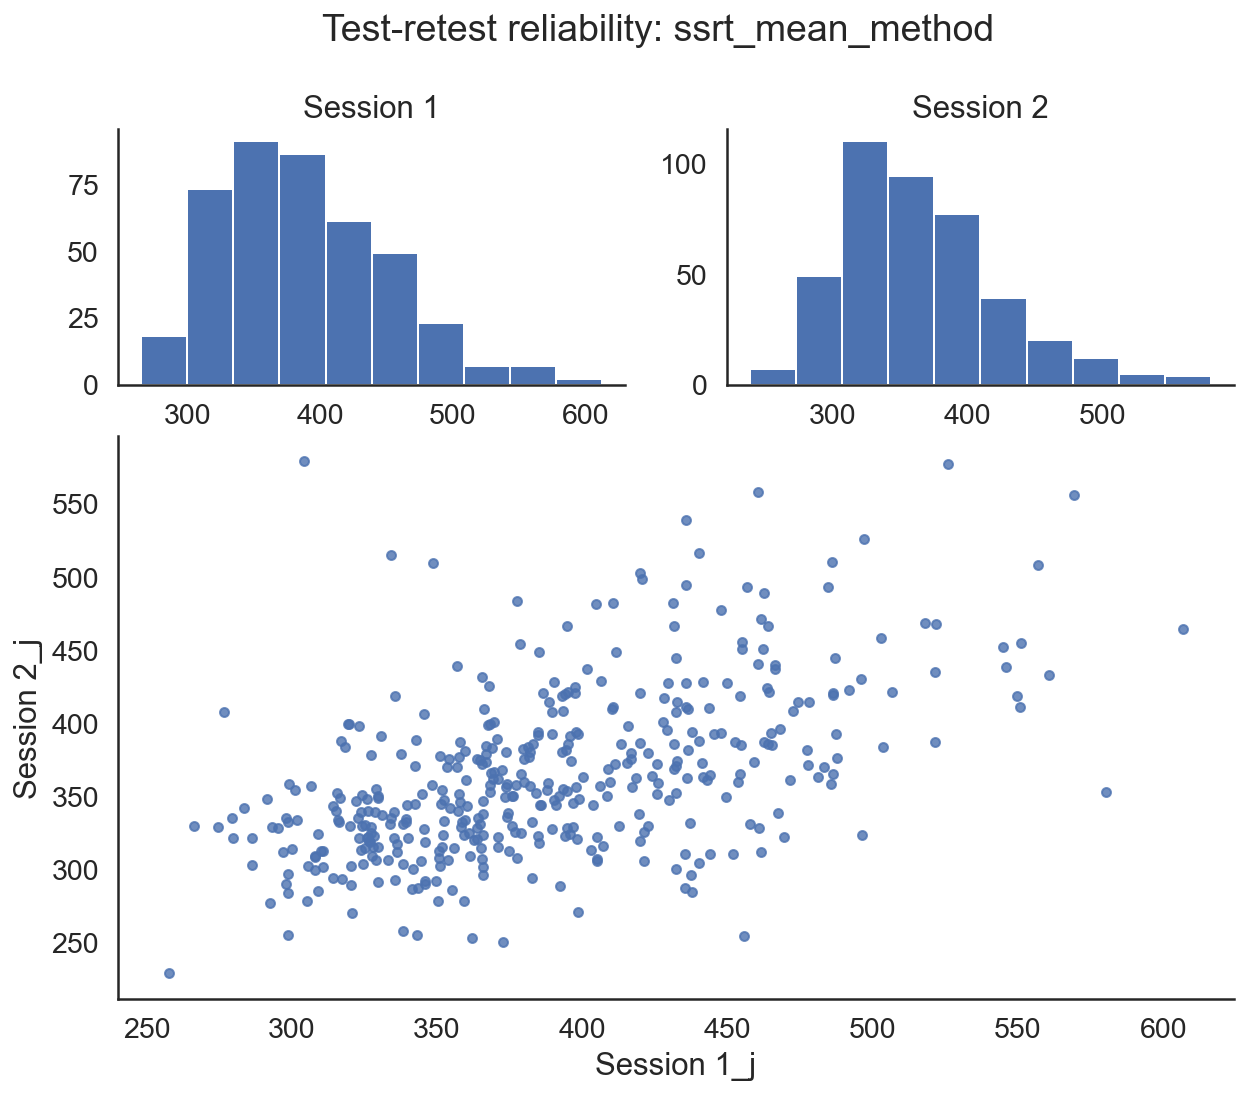

In [ ]:
_df = sst_scoring.get_mean_method_ssrts(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean = stats.analyze_reliability(_df, dependent = 'ssrt_mean_method', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `sst_scoring.get_ssrt_sep`).

In [ ]:
%%capture
_df, ms = sst_scoring.get_ssrt_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.481,2.852,416.0,417.0,0.0,0.416,0.540,".48 (.42, .54)"
Single_random_raters,ICC2,0.500,3.332,416.0,416.0,0.0,0.386,0.590,".50 (.39, .59)"
Single_fixed_raters,ICC3,0.538,3.332,416.0,416.0,0.0,0.478,0.593,".54 (.48, .59)"
Average_raters_absolute,ICC1k,0.649,2.852,416.0,417.0,0.0,0.588,0.702,".65 (.59, .70)"
Average_random_raters,ICC2k,0.666,3.332,416.0,416.0,0.0,0.557,0.742,".67 (.56, .74)"
Average_fixed_raters,ICC3k,0.700,3.332,416.0,416.0,0.0,0.647,0.745,".70 (.65, .74)"


,variance,Percent
ID,1896.179,0.500
Items,273.268,0.072
Residual,1626.416,0.428
Total,3795.864,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


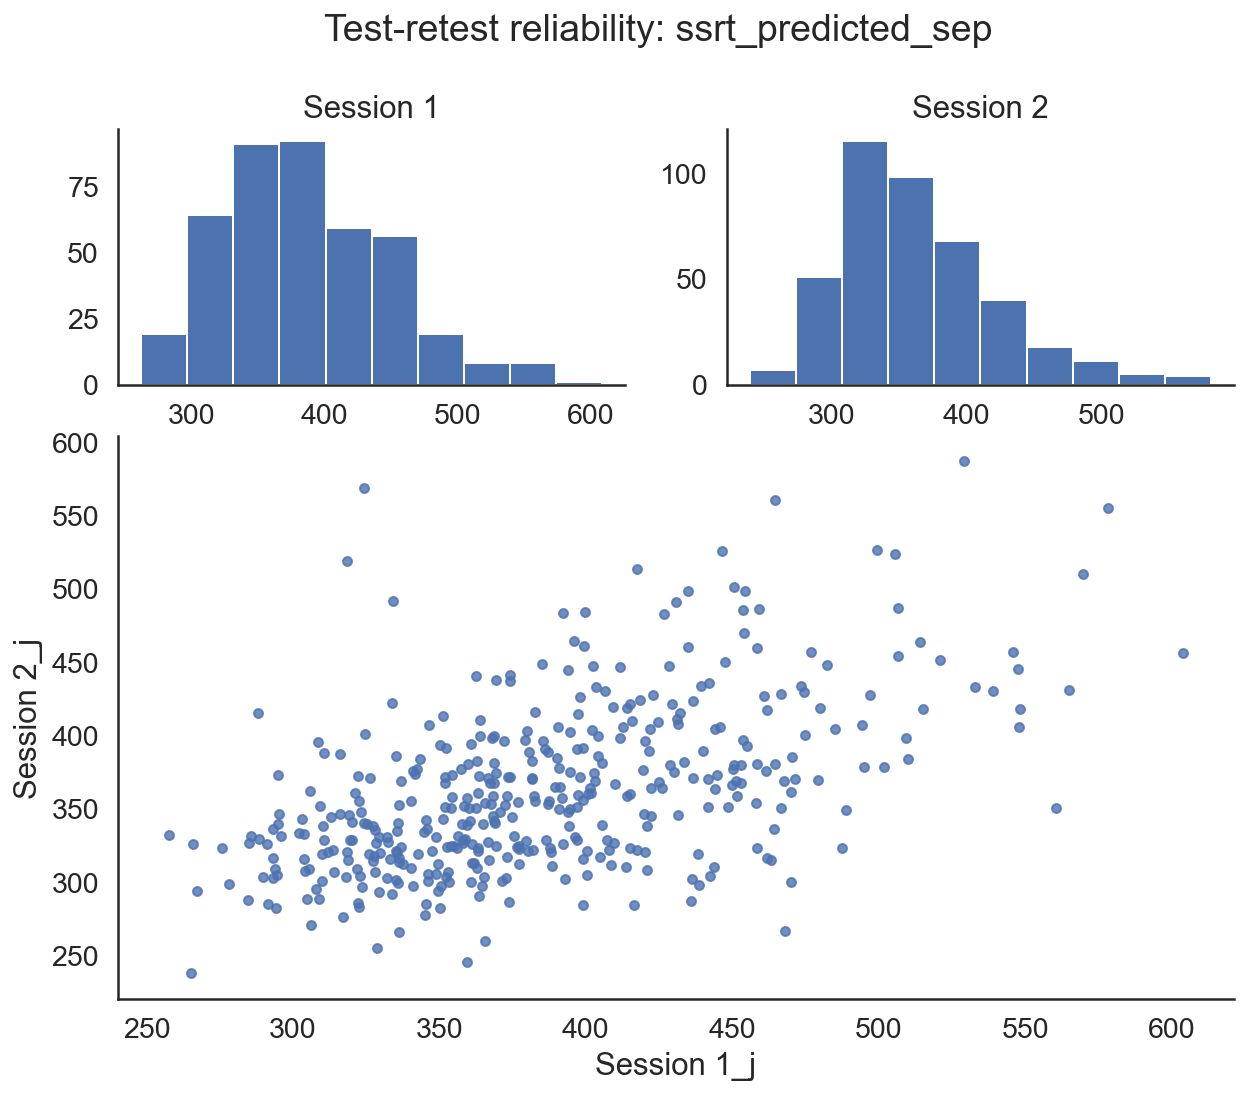

In [ ]:
iccs_perc_predicted_sep = stats.analyze_reliability(_df, dependent = 'ssrt_predicted_sep', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `sst_scoring.get_ssrt_predicted_joint`).

In [ ]:
_df, ms = sst_scoring.get_ssrt_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

var.intercept.participant:is_stop is 2145 vs 1966
var.intercept.session:(participant:is_stop) is closish to the combined session and residual

In [ ]:
(1966.708 + 103.042) / 2918.515

0.7091791544672548

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.679,5.228,416.0,417.0,0.0,0.633,0.720,".68 (.63, .72)"
Single_random_raters,ICC2,0.686,6.030,416.0,416.0,0.0,0.593,0.753,".69 (.59, .75)"
Single_fixed_raters,ICC3,0.716,6.030,416.0,416.0,0.0,0.674,0.753,".72 (.67, .75)"
Average_raters_absolute,ICC1k,0.809,5.228,416.0,417.0,0.0,0.775,0.837,".81 (.78, .84)"
Average_random_raters,ICC2k,0.813,6.030,416.0,416.0,0.0,0.744,0.859,".81 (.74, .86)"
Average_fixed_raters,ICC3k,0.834,6.030,416.0,416.0,0.0,0.805,0.859,".83 (.81, .86)"


,variance,Percent
ID,1926.570,0.686
Items,117.516,0.042
Residual,766.027,0.273
Total,2810.113,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


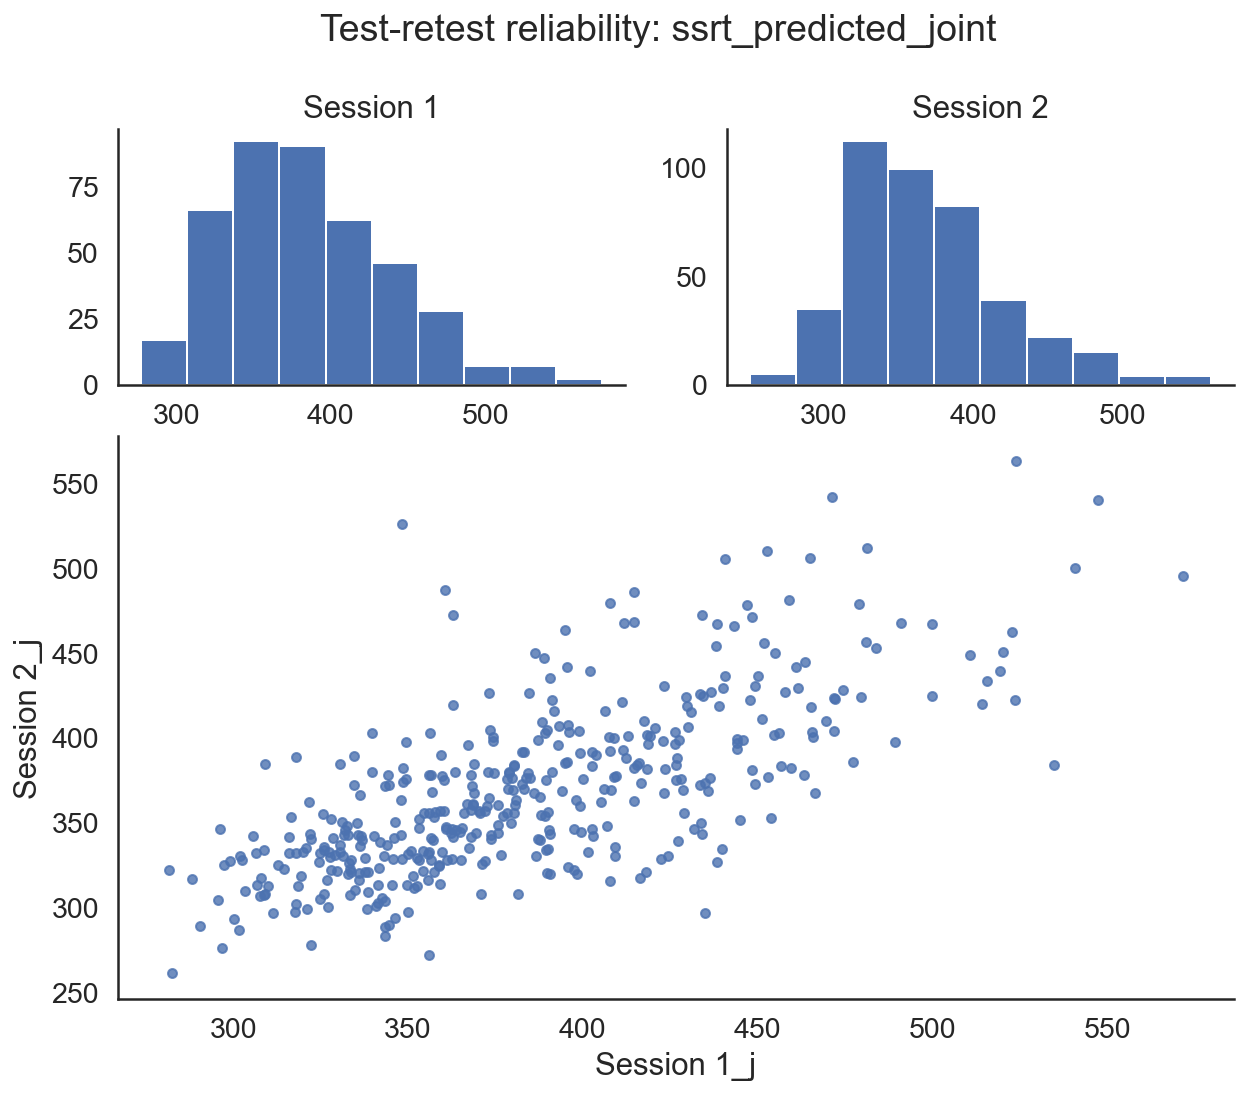

In [ ]:
iccs_perc_predicted_joint = stats.analyze_reliability(_df, dependent = 'ssrt_predicted_joint', add_jitter = True)

### Based on model-calculated variances

In [ ]:
model_calc = stats.get_model_calculated_icc(ms)
model_calc['icc']

R[write to console]: Lade nötiges Paket: insight



0.6977956949172426

## Comparison of methods

### All methods

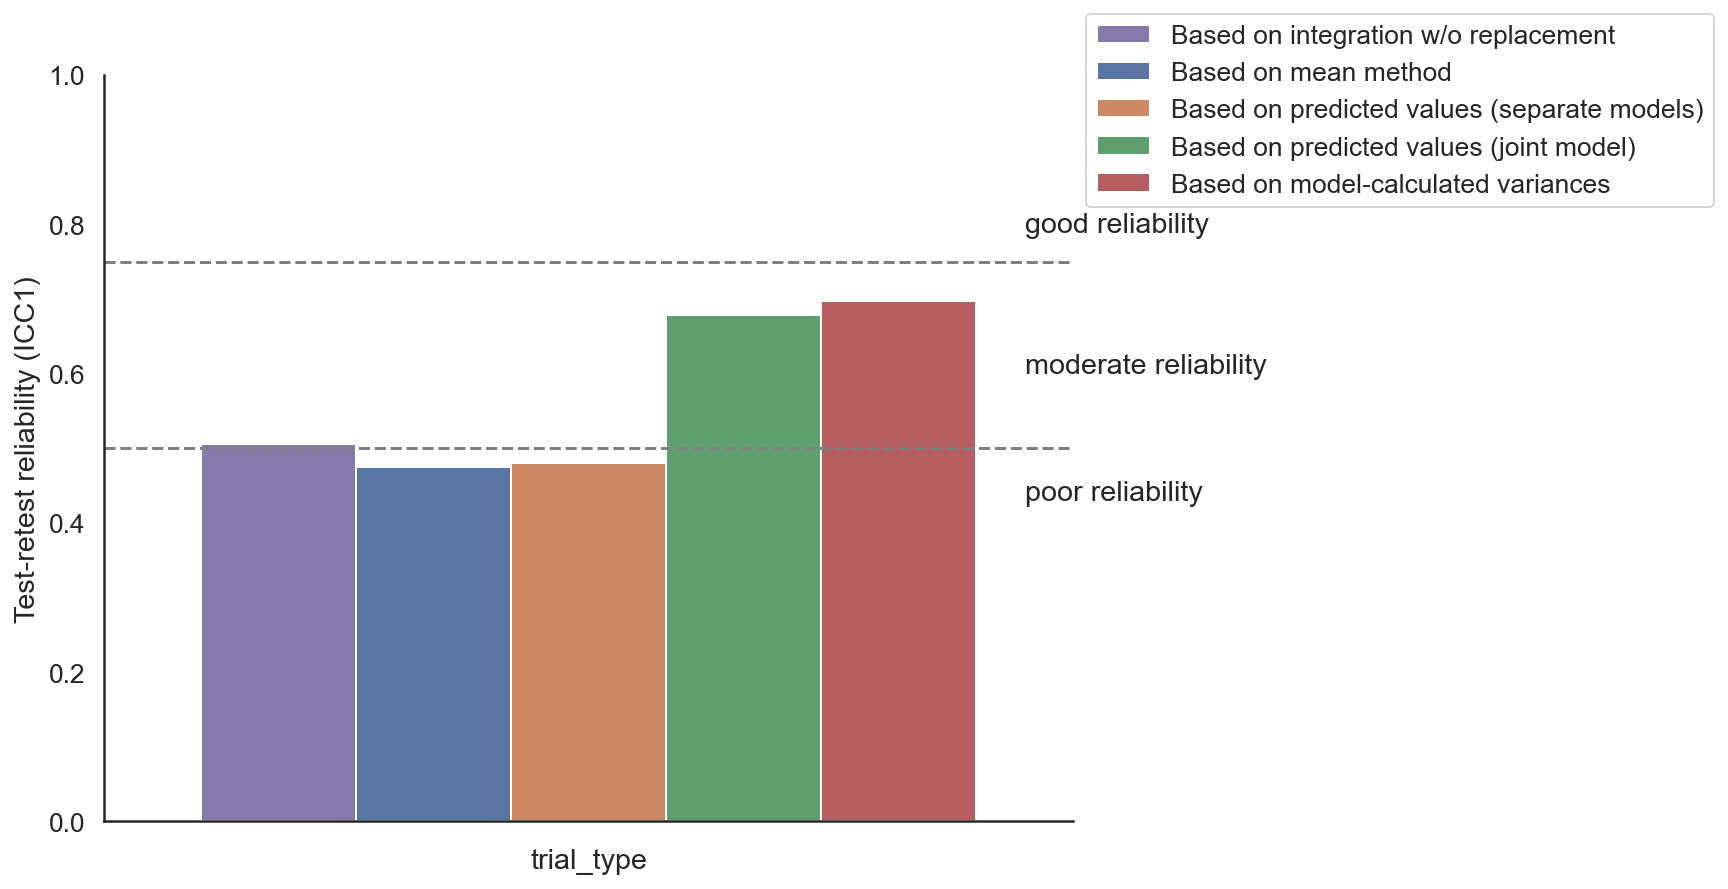

In [ ]:
iccs = {
    "Based on integration w/o replacement_": iccs_integration_wo_replacement,
    "mean_": iccs_mean,
    "trial_sep_": iccs_perc_predicted_sep,
    "trial_joint_": iccs_perc_predicted_joint,
    "model_calc_": model_calc
}

palette = [sns.color_palette()[4]] + sns.color_palette()
g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 0.45, font_scale = 1.2, palette = palette)

### Selected methods for manuscript

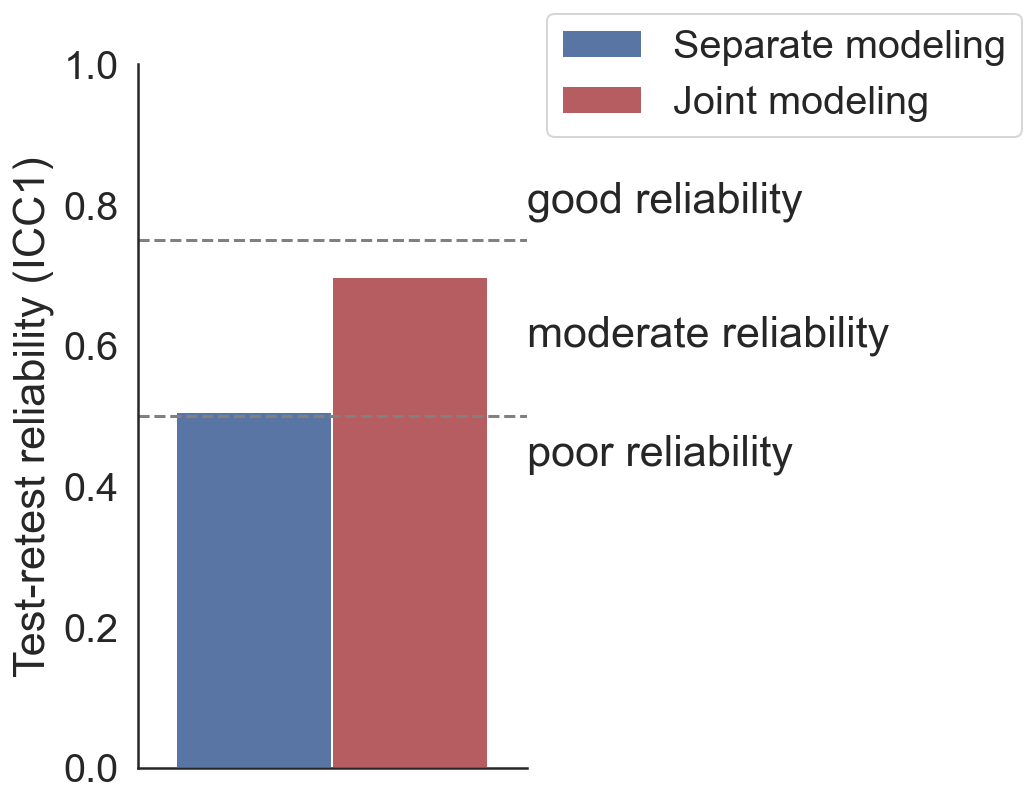

In [ ]:
iccs = {
    "Separate modeling_": iccs_integration_wo_replacement,
    "Joint modeling_": model_calc,
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = .7,
                       qualitative_labels = True,
                       x_offset = .5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('');


## Variance proportions

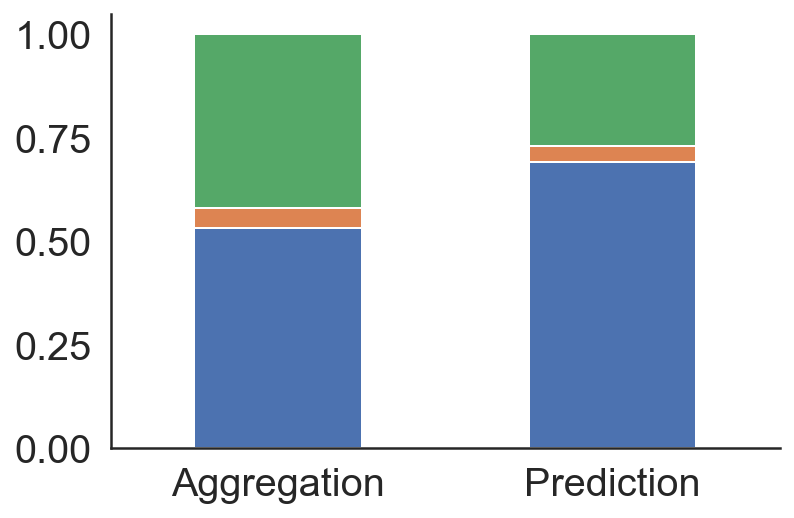

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_integration_wo_replacement,'Prediction':iccs_perc_predicted_joint})
ax.get_legend().remove()

In [ ]:
iccs_integration_wo_replacement

{'fig': <Figure size 720x576 with 3 Axes>,
 'iccs': (                          type       ICC         F    df1    df2  \
  Single_raters_absolute    ICC1  0.520599  3.171875  384.0  385.0   
  Single_random_raters      ICC2  0.532291  3.541175  384.0  384.0   
  Single_fixed_raters       ICC3  0.559585  3.541175  384.0  384.0   
  Average_raters_absolute  ICC1k  0.684729  3.171875  384.0  385.0   
  Average_random_raters    ICC2k  0.694765  3.541175  384.0  384.0   
  Average_fixed_raters     ICC3k  0.717608  3.541175  384.0  384.0   
  
                                      p  lower bound  upper bound  \
  Single_raters_absolute   1.523465e-28     0.456736     0.579131   
  Single_random_raters     1.727323e-33     0.440590     0.608335   
  Single_fixed_raters      1.727323e-33     0.499160     0.614595   
  Average_raters_absolute  1.523465e-28     0.627067     0.733481   
  Average_random_raters    1.727323e-33     0.611680     0.756478   
  Average_fixed_raters     1.727323e-33   

In [ ]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

,Participant,Session,Residual
Aggregation,0.532291,0.048776,0.418933
Prediction,0.691542,0.039188,0.269270


Text(0, 0.5, '% change variance')

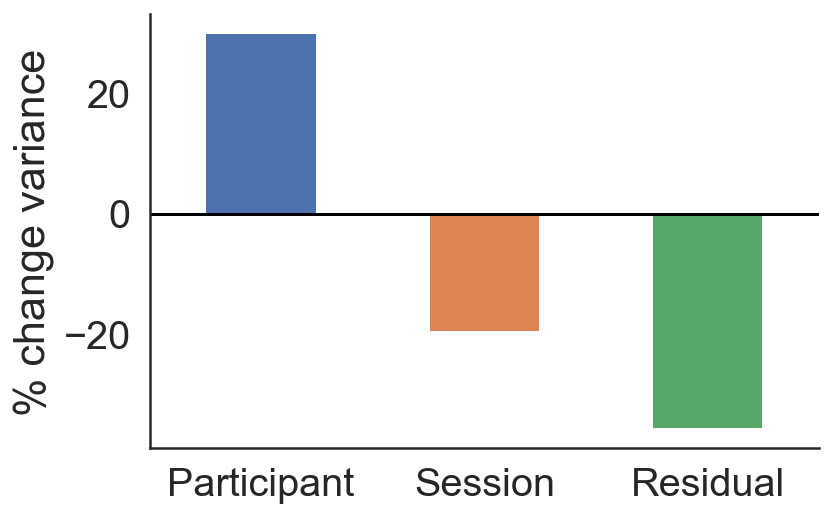

In [ ]:
def var_comp_plot_2(results):
    perc_variance = []
    for r in results.items():
        _df = r[1]['iccs'][1].T
        _df.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(_df[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    display(df)
    df.iloc[1] = df.iloc[1]/df.iloc[0]
    df = (df-1)*100
    
    ax = df.iloc[1].plot(kind = 'bar', stacked = False, color = sns.color_palette()[:3])
    ax.grid(False)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)
    ax.axhline(0, color = 'black')
    #ax.set_ylim([-100,100])
    return ax

ax = var_comp_plot_2({'Aggregation':iccs_integration_wo_replacement,'Prediction':iccs_perc_predicted_joint})
ax.get_legend().remove()
ax.set_ylabel("% change variance")

Note that variance is scale dependent.

### Why is total variance reduced?

## Effect of time

In [ ]:
scores = stats.get_scores(dp, dp.get_sst_data, sst_scoring.get_ssrt_predicted_joint)

### Area

N = 100


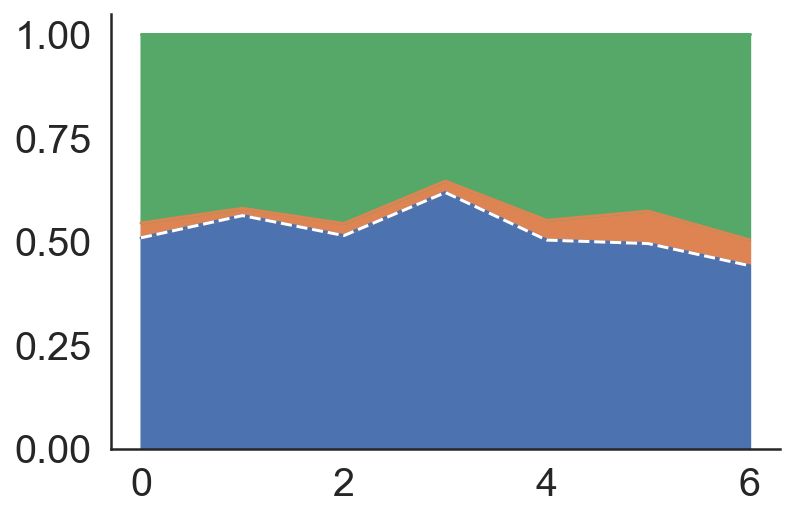

In [ ]:
stats.plot_time_effect_area(scores, 8, "ssrt_predicted_joint")

### Absolute variance

N = 100


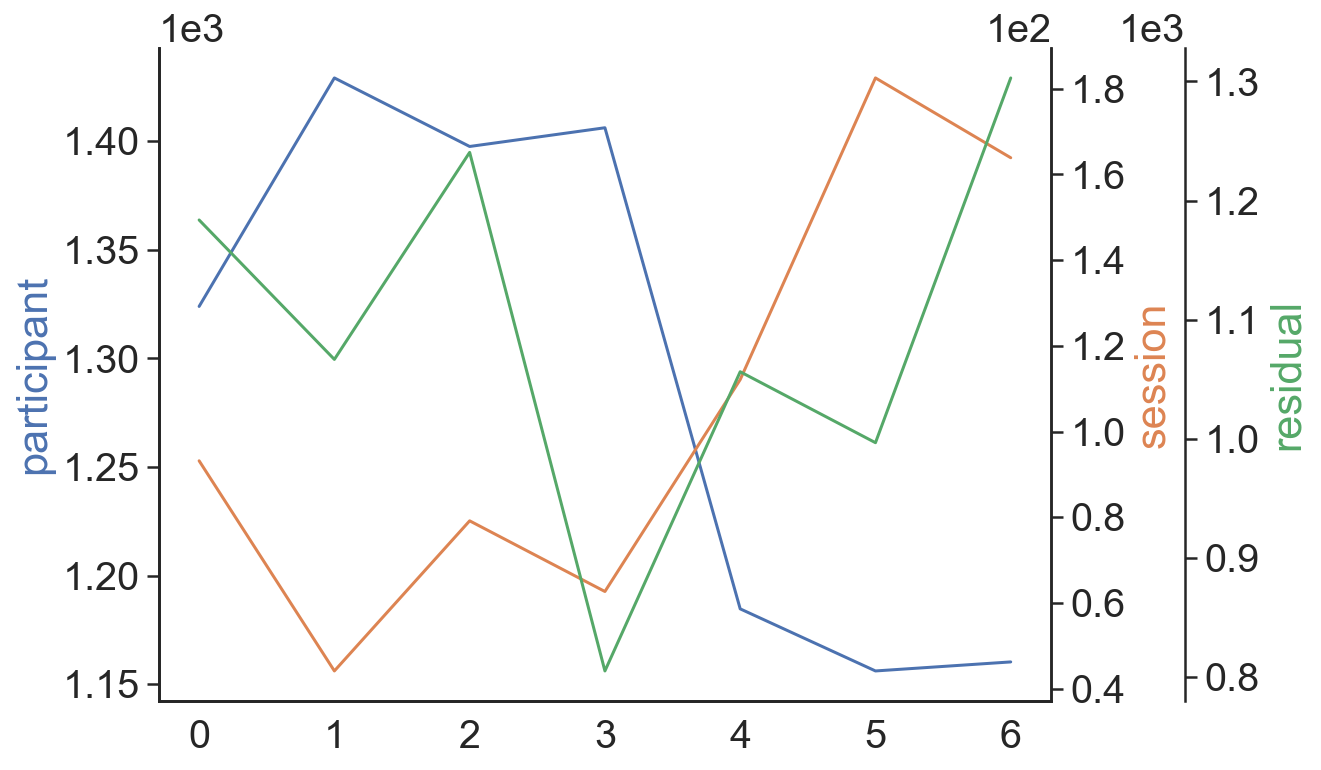

In [ ]:
ax = stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

### Absolute variance change

N = 100


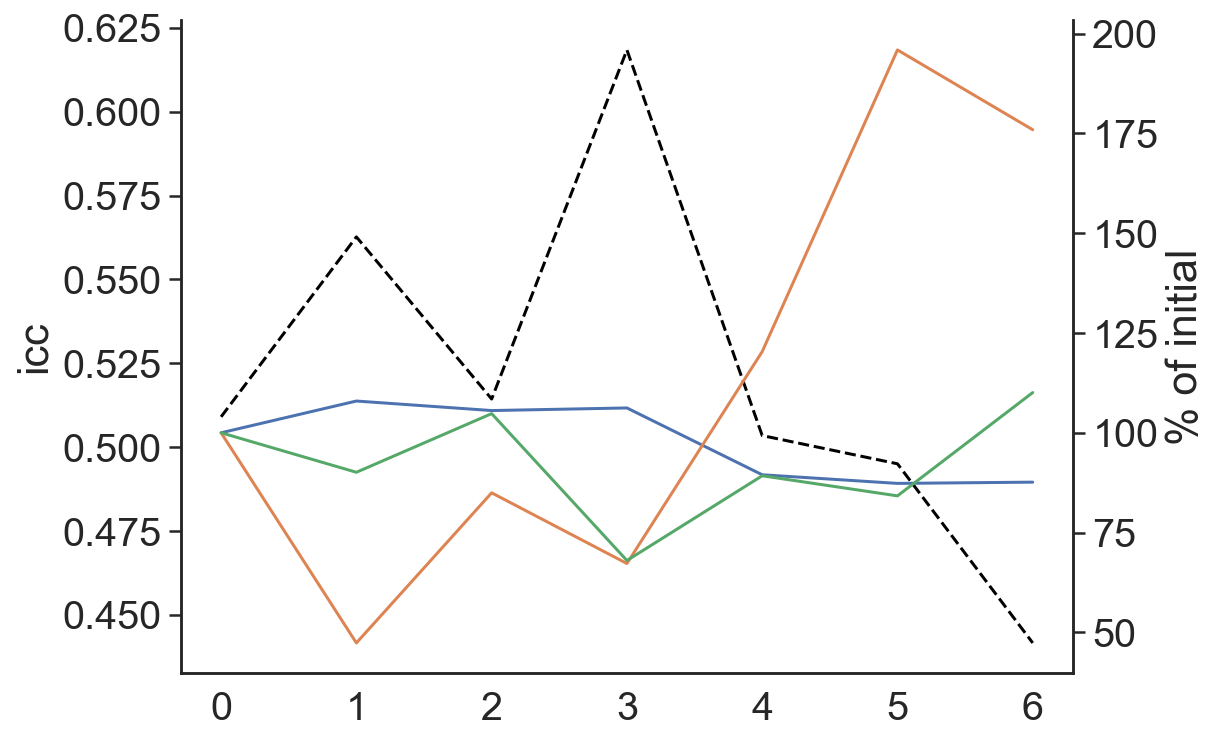

In [ ]:
ax = stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

## Effect of time

In [ ]:
scores = stats.get_scores(dp, dp.get_sst_data, sst_scoring.get_ssrt_predicted_joint)

N = 100


<AxesSubplot:ylabel='participant'>

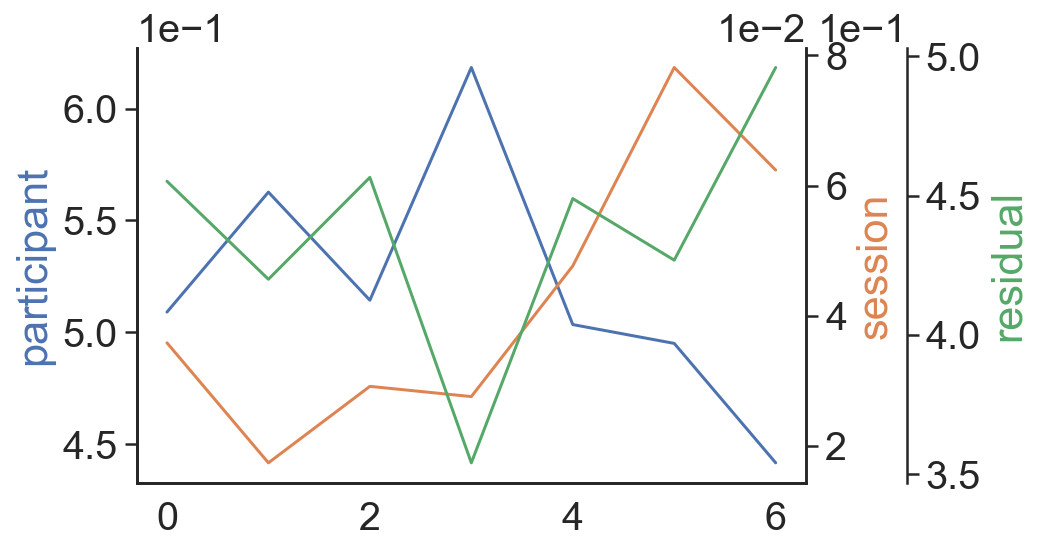

In [ ]:
stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", legend = False)

N = 100


<AxesSubplot:ylabel='% of initial'>

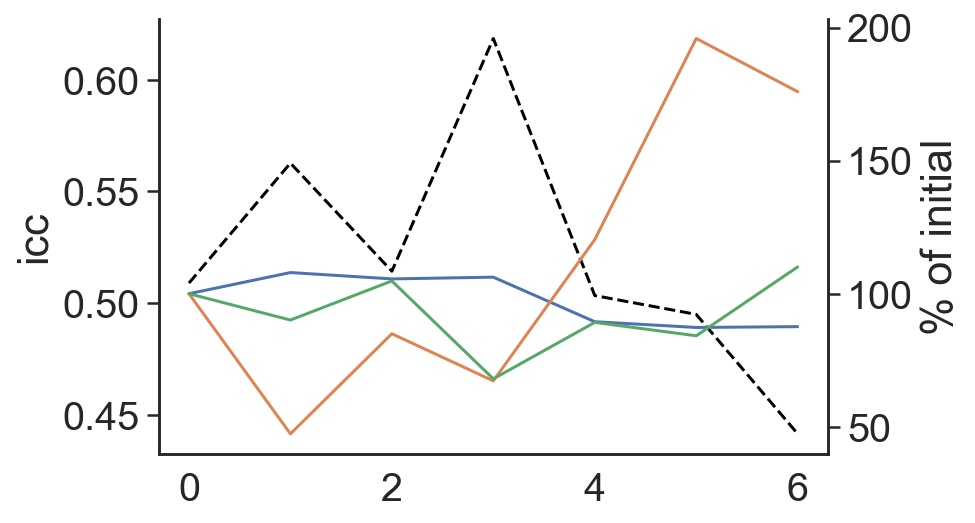

In [ ]:
stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = True)

N = 100


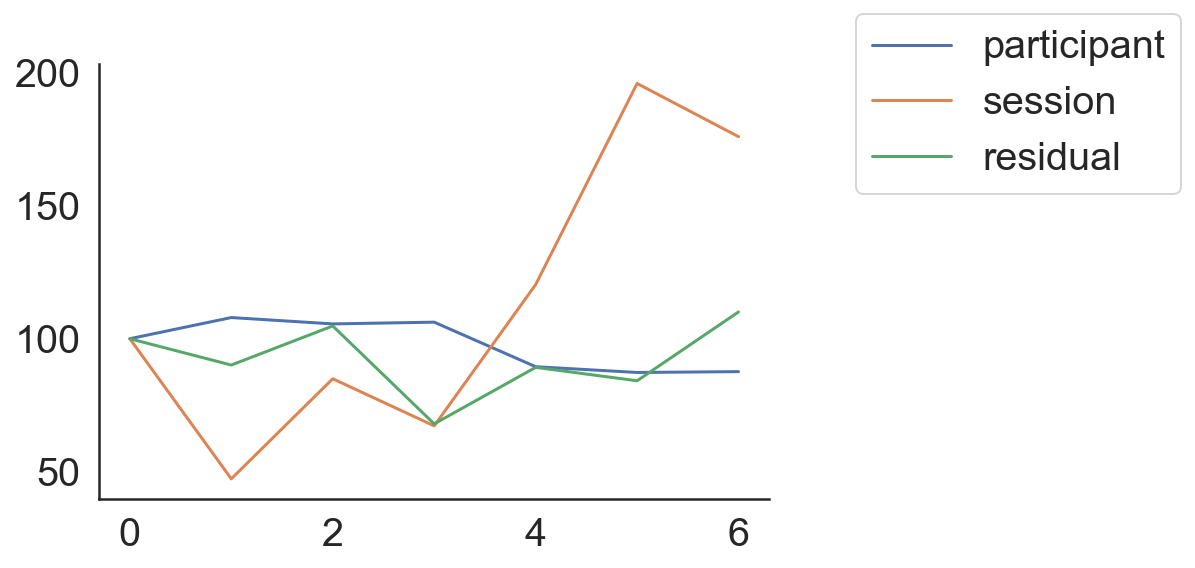

In [ ]:
def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']

def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    #display(df)
    #ax = df.plot(y="participant", legend=False, color = sns.color_palette()[0])
    #ax2 = ax.twinx()
    #df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
    #ax3 = ax.twinx()
    #df.plot(y="residual", ax=ax2, legend=False, color = sns.color_palette()[2])
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)
    
plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = True)